<a href="https://colab.research.google.com/github/idoncode/CNN_with_Transfer_Learning/blob/main/CNN_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNNs and Computer vision with Tensorflow

Computer vision is the practive of writing algorithms which can discover patterns in visula data. Such as incase of self-driving cars recognizing the obstacles in-front of it.

# Get the data

The images we are working with are from the Food101 dataset (101 different classes of food)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-08 04:35:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.207, 74.125.26.207, 172.217.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   150MB/s    in 0.7s    

2023-10-08 04:35:43 (150 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the Data (becoming one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project ... this usually means visualizing many samples of your data.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os

## walkthorugh pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


750 train images each for Pizza and Steak train data

250 test images each for Pizza and Steak train data

In [ ]:
## Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))

print(f"There are {num_pizza_images_train} pizza images and {num_steak_images_train} steak images for training and {num_pizza_images_test} pizza images and {num_steak_images_test} steak images for testing")

There are 750 pizza images and 750 steak images for training and 250 pizza images and 250 steak images for testing


To visualize our images, first let's get the class names programmatically

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
## Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  ## Setup the target diectorty (we'll view images from here)
  target_folder = target_dir + target_class

  ## Getting a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  ## Reading the image and plotting using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image Shape: {img.shape}') ## showing the shape of the image

  return img

['2640502.jpg']
Image Shape: (512, 512, 3)


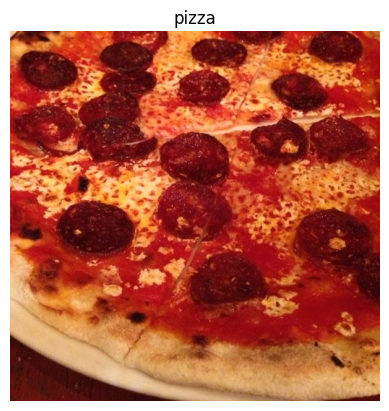

In [ ]:
## View a random image from the training dataset
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'pizza')

In [ ]:
## The mages we've imported and plotted are actually giant arrays/tensors of different pixel values

import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[246, 200, 141],
        [246, 201, 144],
        [245, 204, 152],
        ...,
        [201, 116,  52],
        [205, 121,  57],
        [207, 123,  59]],

       [[247, 200, 144],
        [244, 199, 144],
        [247, 206, 154],
        ...,
        [196, 111,  47],
        [198, 114,  50],
        [199, 115,  51]],

       [[251, 206, 151],
        [251, 208, 155],
        [250, 208, 158],
        ...,
        [195, 110,  46],
        [196, 113,  47],
        [198, 115,  49]],

       ...,

       [[ 78,  19,  11],
        [ 80,  20,  12],
        [ 82,  22,  14],
        ...,
        [ 79,  10,  13],
        [ 78,   9,  12],
        [ 78,   9,  12]],

       [[ 80,  19,  14],
        [ 81,  20,  15],
        [ 84,  21,  14],
        ...,
        [ 80,  12,  13],
        [ 79,  11,  12],
        [ 79,  11,  12]],

       [[ 85,  24,  19],
        [ 85,  24,  19],
        [ 89,  24,  18],
        ...,
        [ 81,  13,  1

In [ ]:
## View the image shape
img.shape ## returns height, width color channels

(512, 512, 3)

Now we need to NORMALIZE or SCALE our input values

In [ ]:
## Get all the pixel values between 0 and 1
img/225

array([[[1.09333333, 0.88888889, 0.62666667],
        [1.09333333, 0.89333333, 0.64      ],
        [1.08888889, 0.90666667, 0.67555556],
        ...,
        [0.89333333, 0.51555556, 0.23111111],
        [0.91111111, 0.53777778, 0.25333333],
        [0.92      , 0.54666667, 0.26222222]],

       [[1.09777778, 0.88888889, 0.64      ],
        [1.08444444, 0.88444444, 0.64      ],
        [1.09777778, 0.91555556, 0.68444444],
        ...,
        [0.87111111, 0.49333333, 0.20888889],
        [0.88      , 0.50666667, 0.22222222],
        [0.88444444, 0.51111111, 0.22666667]],

       [[1.11555556, 0.91555556, 0.67111111],
        [1.11555556, 0.92444444, 0.68888889],
        [1.11111111, 0.92444444, 0.70222222],
        ...,
        [0.86666667, 0.48888889, 0.20444444],
        [0.87111111, 0.50222222, 0.20888889],
        [0.88      , 0.51111111, 0.21777778]],

       ...,

       [[0.34666667, 0.08444444, 0.04888889],
        [0.35555556, 0.08888889, 0.05333333],
        [0.36444444, 0

## An end-to-end example

Lets build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* load our images
* preprocess our images
* build a CNN to find patterns in our images
* compile our CNN
* fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## set the seed
tf.random.set_seed(42)

## Preprocessing data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

## Setup paths to our directores
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

## Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

## Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,  activation = 'sigmoid')
])


## Compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 26s 189ms/step - loss: 0.6363 - accuracy: 0.6440 - val_loss: 0.5168 - val_accuracy: 0.7560
Epoch 2/10
47/47 [==============================] - 5s 110ms/step - loss: 0.5122 - accuracy: 0.7620 - val_loss: 0.3933 - val_accuracy: 0.8480
Epoch 3/10
47/47 [==============================] - 6s 123ms/step - loss: 0.4124 - accuracy: 0.8113 - val_loss: 0.3203 - val_accuracy: 0.8700
Epoch 4/10
47/47 [==============================] - 6s 117ms/step - loss: 0.3536 - accuracy: 0.8547 - val_loss: 0.3014 - val_accuracy: 0.8780
Epoch 5/10
47/47 [==============================] - 6s 133ms/step - loss: 0.3015 - accuracy: 0.8727 - val_loss: 0.3750 - val_accuracy: 0.8460
Epoch 6/10
47/47 [==============================] - 5s 111ms/step - loss: 0.2338 - accuracy: 0.9027 - val_loss: 0.2981 - val_accuracy: 0.8940
Epoch 7/10
47/47 [==============================] - 6s 133ms/ste

In [ ]:
## Getting model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

The model we're building is from the Tensorflow playground



In [ ]:
# Set random seed
tf.random.set_seed(42)

## Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

## Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 6s 109ms/step - loss: 0.7090 - accuracy: 0.5113 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 6s 122ms/step - loss: 0.6940 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

In [ ]:
## Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terrbily

In [ ]:
## set random seed
tf.random.set_seed(42)

## Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

## Compile the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## Fit the model
model_3.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))


Epoch 1/10
47/47 [==============================] - 7s 106ms/step - loss: 2.0169 - accuracy: 0.6407 - val_loss: 0.6881 - val_accuracy: 0.6700
Epoch 2/10
47/47 [==============================] - 5s 101ms/step - loss: 0.7591 - accuracy: 0.6780 - val_loss: 0.5023 - val_accuracy: 0.7640
Epoch 3/10
47/47 [==============================] - 6s 121ms/step - loss: 0.5696 - accuracy: 0.7440 - val_loss: 0.4700 - val_accuracy: 0.7660
Epoch 4/10
47/47 [==============================] - 5s 100ms/step - loss: 0.4567 - accuracy: 0.8020 - val_loss: 0.4307 - val_accuracy: 0.8060
Epoch 5/10
47/47 [==============================] - 6s 126ms/step - loss: 0.4926 - accuracy: 0.7893 - val_loss: 0.5205 - val_accuracy: 0.7600
Epoch 6/10
47/47 [==============================] - 5s 101ms/step - loss: 0.4642 - accuracy: 0.7967 - val_loss: 0.4537 - val_accuracy: 0.7940
Epoch 7/10
47/47 [==============================] - 6s 121ms/step - loss: 0.3975 - accuracy: 0.8300 - val_loss: 0.5022 - val_accuracy: 0.7600
Epoch 

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15078201 (57.52 MB)
Trainable params: 15

## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data(prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve the model (try to beat our baseline)
7. Repeat until stasfied (experiment a lot)

['2002400.jpg']
Image Shape: (384, 512, 3)
['370643.jpg']
Image Shape: (512, 382, 3)


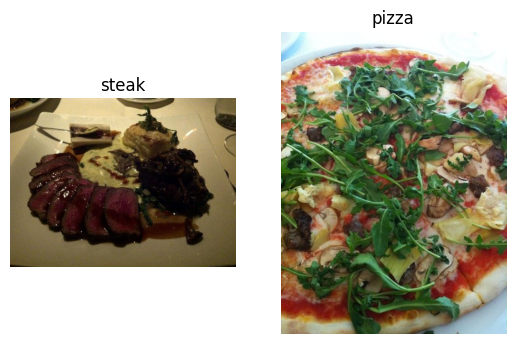

In [ ]:
## Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_image = view_random_image('pizza_steak/train/', 'pizza')

2. Preprocess the data (prepare it for a model)

In [ ]:
## Define our directory dataset paths

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than looking at all 10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of our processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32? Good practice!!

IMAGE DATA GENERATOR for augmenting and transforming our images in the dataset

applying the transformation from IMAGE DATA GEN to the train and test sets using FLOW FROM DIRECTORY

In [ ]:
## Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
## Load in our image data from directories and turn them into batches
## Way of creating tensorflow input pipeline for the datasets

train_data = train_datagen.flow_from_directory(directory = train_dir, ## Target dir of images
                                               target_size = (224, 224), ## Target size of images
                                               class_mode = 'binary', ## type of data data you are working with
                                               batch_size = 32) ## size of minibatches to load data into


test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
## Get a sample of a training data batch

images, labels = train_data.next() ## get the 'next' batch of images/labels in train_data

len(images), len(images)

(32, 32)

In [ ]:
## How many batchs are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
## Get the first two images
images[:2], images[0].shape

(array([[[[0.57254905, 0.5058824 , 0.4431373 ],
          [0.54509807, 0.37254903, 0.32156864],
          [0.61960787, 0.3921569 , 0.3137255 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 0.9921569 , 0.9921569 ],
          [1.        , 0.9921569 , 1.        ]],
 
         [[0.4666667 , 0.35686275, 0.3019608 ],
          [0.4666667 , 0.3372549 , 0.27058825],
          [0.54901963, 0.34509805, 0.25882354],
          ...,
          [1.        , 1.        , 0.9921569 ],
          [1.        , 1.        , 0.9921569 ],
          [0.9843138 , 1.        , 1.        ]],
 
         [[0.39607847, 0.3019608 , 0.25490198],
          [0.38431376, 0.32156864, 0.25882354],
          [0.427451  , 0.28627452, 0.22352943],
          ...,
          [0.9960785 , 0.9960785 , 0.98823535],
          [0.9450981 , 0.9803922 , 0.97647065],
          [0.87843144, 0.9568628 , 0.9607844 ]],
 
         ...,
 
         [[0.8862746 , 0.86666673, 0.78823537],
          [0.89803

In [ ]:
## View the first batch of labels
labels

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

Create a CNN model (start with a baseline)


A baseline is a relatively simple model or existing result that you setup when beginning a ML experiment and then as you keep experimenting, you try to beat the baseline.


NOTE: In deeplearning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as and when required.

In [ ]:
## Making the creating of our model a little more easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model(this will be our baseline, a layer convolutional neural network)
model_4  = Sequential([
    Conv2D(filters = 10,          ## filter is the number of sliding windows going across an input (higher = more complex)
           kernel_size = 3,       ## the size of the sliding window going across an input
           strides = 1,           ## the step size of the sliding window across the input
           padding = 'valid',     ## if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
           activation = 'relu',
           input_shape = (224,224,3)), # input layer (specify the input shape)
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
## compiling the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## checking the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
## Fitting the model
history_4 = model_4.fit(train_data, ## this is a combination of labels and sample data
                    epochs = 10,
                    steps_per_epoch = len(train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 8s 122ms/step - loss: 0.7390 - accuracy: 0.6093 - val_loss: 0.6314 - val_accuracy: 0.6540
Epoch 2/10
47/47 [==============================] - 7s 143ms/step - loss: 0.4987 - accuracy: 0.7667 - val_loss: 0.4081 - val_accuracy: 0.8100
Epoch 3/10
47/47 [==============================] - 6s 118ms/step - loss: 0.3774 - accuracy: 0.8373 - val_loss: 0.4289 - val_accuracy: 0.8020
Epoch 4/10
47/47 [==============================] - 6s 118ms/step - loss: 0.2611 - accuracy: 0.8960 - val_loss: 0.3543 - val_accuracy: 0.8500
Epoch 5/10
47/47 [==============================] - 7s 142ms/step - loss: 0.1504 - accuracy: 0.9560 - val_loss: 0.3856 - val_accuracy: 0.8320
Epoch 6/10
47/47 [==============================] - 5s 114ms/step - loss: 0.0718 - accuracy: 0.9827 - val_loss: 0.4912 - val_accuracy: 0.8240
Epoch 7/10
47/47 [==============================] - 6s 131ms/step - loss: 0.0381 - accuracy: 0.9900 - val_loss: 0.8550 - val_accuracy: 0.7500
Epoch 

## Evaluating the model


<Axes: >

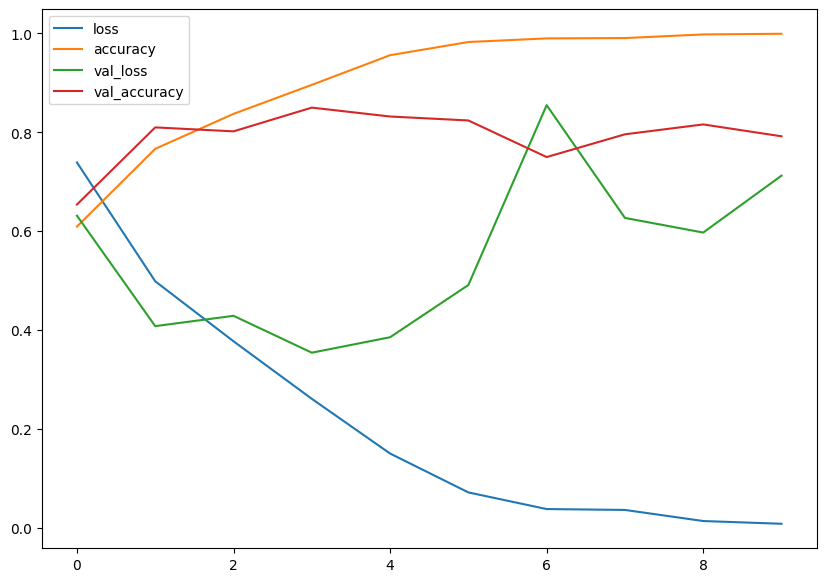

In [ ]:
## Plotting the training curves
import pandas as pd


pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
## Plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) ## how many epochs did we run for

  # plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

When a model's **validation loss** starts to increase, it's likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset *too well* and thus the model's ability to generalize the unseen data is diminished.

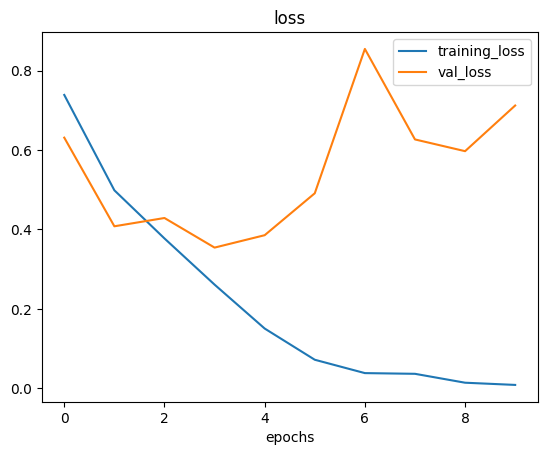

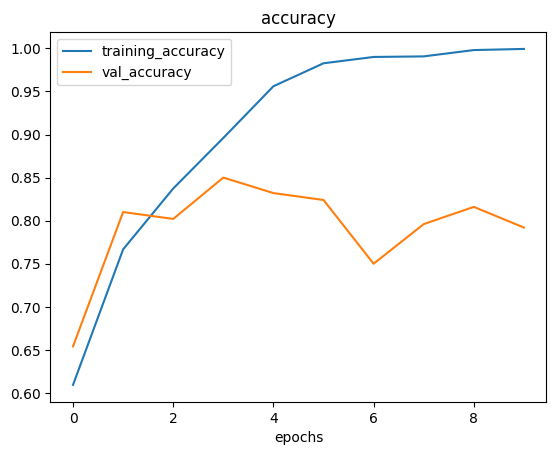

In [ ]:
## Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

Ideally the two loss curves(training and validation) will be similar to each other

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense later to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data ...


>> NOTE: Reducing overfitting is also known as **regularization**

In [ ]:
## Create the model (this is going to be our new baseline)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,
                           padding = 'valid',
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10,3,
                           padding = 'valid',
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,
                           padding = 'valid',
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
## Compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
## Fit the model
history_5 = model_5.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 8s 108ms/step - loss: 0.6331 - accuracy: 0.6420 - val_loss: 0.4583 - val_accuracy: 0.8000
Epoch 2/10
47/47 [==============================] - 6s 125ms/step - loss: 0.4730 - accuracy: 0.7787 - val_loss: 0.3816 - val_accuracy: 0.8340
Epoch 3/10
47/47 [==============================] - 5s 109ms/step - loss: 0.4307 - accuracy: 0.8107 - val_loss: 0.3622 - val_accuracy: 0.8620
Epoch 4/10
47/47 [==============================] - 5s 107ms/step - loss: 0.3974 - accuracy: 0.8260 - val_loss: 0.3508 - val_accuracy: 0.8700
Epoch 5/10
47/47 [==============================] - 6s 129ms/step - loss: 0.3805 - accuracy: 0.8407 - val_loss: 0.3308 - val_accuracy: 0.8760
Epoch 6/10
47/47 [==============================] - 5s 108ms/step - loss: 0.3684 - accuracy: 0.8513 - val_loss: 0.3111 - val_accuracy: 0.8860
Epoch 7/10
47/47 [==============================] - 5s 107ms/step - loss: 0.3463 - accuracy: 0.8567 - val_loss: 0.3806 - val_accuracy: 0.8240
Epoch 

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

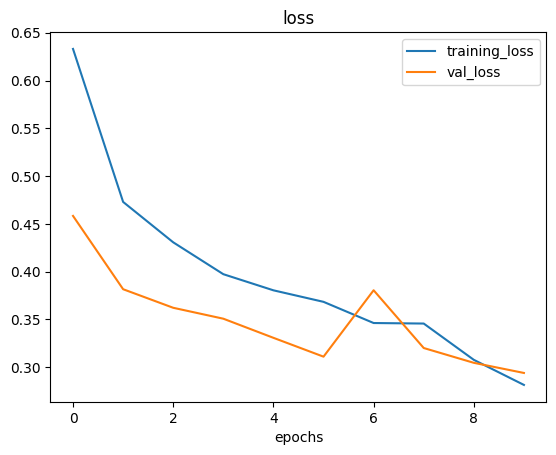

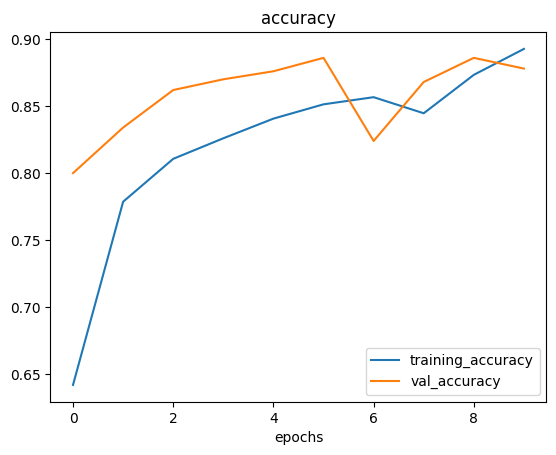

In [ ]:
## PLOT LOSS CURVES

plot_loss_curves(history_5)

In [ ]:
## Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,      ## how much do you want to rotate an image
                                             shear_range = 0.2,         ## how much do you want to shear an image
                                             zoom_range = 0.2,          ## zooming  in randomly on an image
                                             width_shift_range = 0.2,   ## move your image around the x-axis
                                             height_shift_range = 0.2,  ## move your image aroung the y-axis
                                             horizontal_flip = True)    ## flipping the image horizontally

## Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

## Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

> **What is data augmentation?**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
## Visualizing data augmentation

## Import data and augment it from training directory
IMG_SIZE = (224, 224)


print('Augmented training data: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = IMG_SIZE,
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False)


## Create non-augmented traindata batches
print('Non-augmented training data: ')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SIZE,
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)


## Create non-augmented test data batches
print('Non-augmnted test data: ')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             shuffle = False)

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmnted test data: 
Found 500 images belonging to 2 classes.


NOTE: Data augmentation is usually only performed on the training data. Using IMAGE DATA GENERATOR built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

In [ ]:
## Getting some sample data batches

images, labels = train_data.next()
augmneted_images, augmneted_labels = train_data_augmented.next()

showing image number: 2


(-0.5, 223.5, 223.5, -0.5)

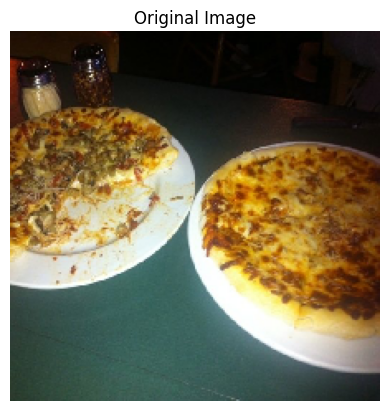

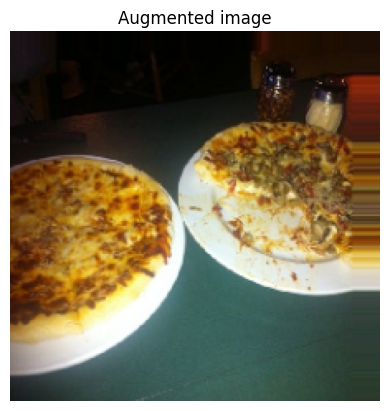

In [ ]:
## Showing the original image and augmneted image

import random
random_number = random.randint(0,32) ## our batch sizes are 32 ...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmneted_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [ ]:
## Creating a model with augmented data

model_6  = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

## Compiling model_6
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## Fitting model_6 on augmented data
history_6 = model_6.fit(train_data_augmented,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 21s 410ms/step - loss: 0.7217 - accuracy: 0.4413 - val_loss: 0.6918 - val_accuracy: 0.5280
Epoch 2/10
47/47 [==============================] - 21s 440ms/step - loss: 0.6926 - accuracy: 0.5167 - val_loss: 0.6882 - val_accuracy: 0.5140
Epoch 3/10
47/47 [==============================] - 20s 415ms/step - loss: 0.6902 - accuracy: 0.5227 - val_loss: 0.6656 - val_accuracy: 0.6920
Epoch 4/10
47/47 [==============================] - 20s 413ms/step - loss: 0.6428 - accuracy: 0.6187 - val_loss: 0.5268 - val_accuracy: 0.7420
Epoch 5/10
47/47 [==============================] - 21s 440ms/step - loss: 0.6110 - accuracy: 0.6913 - val_loss: 0.5686 - val_accuracy: 0.8020
Epoch 6/10
47/47 [==============================] - 19s 414ms/step - loss: 0.5904 - accuracy: 0.7060 - val_loss: 0.4637 - val_accuracy: 0.8360
Epoch 7/10
47/47 [==============================] - 20s 427ms/step - loss: 0.5776 - accuracy: 0.7073 - val_loss: 0.5057 - val_accuracy: 0.7560

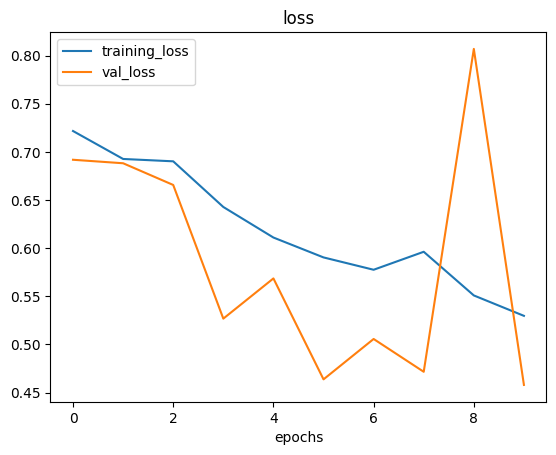

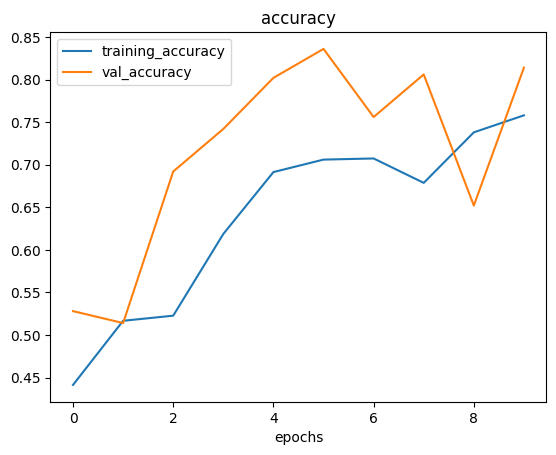

In [ ]:
## Check our models training curves
plot_loss_curves(history_6)

Now trying after **shuffling** our data

In [ ]:
## Import data and augment it and shuffle from training directory

train_data_augmented_shuffled = train_datagen.flow_from_directory(directory = train_dir,
                                                                target_size = IMG_SIZE,
                                                                batch_size = 32,
                                                                class_mode = 'binary',
                                                                shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3,activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 8s 138ms/step - loss: 0.6004 - accuracy: 0.6767 - val_loss: 0.4831 - val_accuracy: 0.7480
Epoch 2/10
47/47 [==============================] - 5s 107ms/step - loss: 0.4695 - accuracy: 0.7913 - val_loss: 0.3864 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 6s 138ms/step - loss: 0.4174 - accuracy: 0.8080 - val_loss: 0.3514 - val_accuracy: 0.8360
Epoch 4/10
47/47 [==============================] - 5s 111ms/step - loss: 0.4168 - accuracy: 0.8160 - val_loss: 0.3513 - val_accuracy: 0.8600
Epoch 5/10
47/47 [==============================] - 5s 111ms/step - loss: 0.3651 - accuracy: 0.8447 - val_loss: 0.3294 - val_accuracy: 0.8480
Epoch 6/10
47/47 [==============================] - 5s 116ms/step - loss: 0.3334 - accuracy: 0.8573 - val_loss: 0.3099 - val_accuracy: 0.8540
Epoch 7/10
47/47 [==============================] - 5s 109ms/step - loss: 0.3048 - accuracy: 0.8773 - val_loss: 0.2941 - val_accuracy: 0.8820
Epoch 

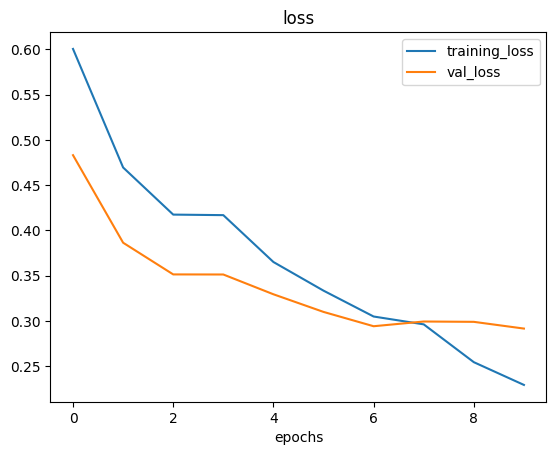

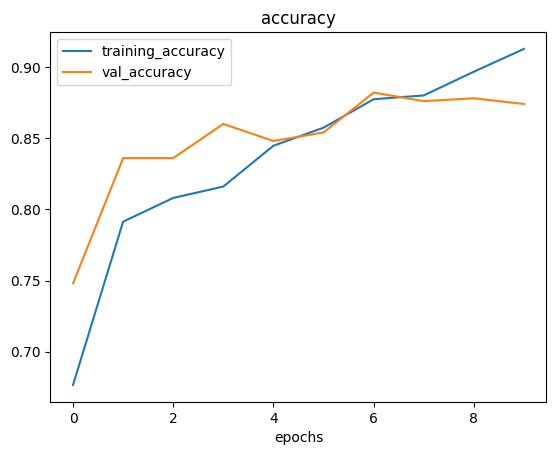

In [ ]:
## Plotting loss curves for model_7
plot_loss_curves(history_7)

**NOTE:** When shuffling training data, the model gets exposed to all different kinds of data during training, this enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak)

## 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each conv layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Gate more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [ ]:
## Classes
print(class_names)

['pizza' 'steak']


--2023-10-08 04:47:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2023-10-08 04:47:47 (23.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

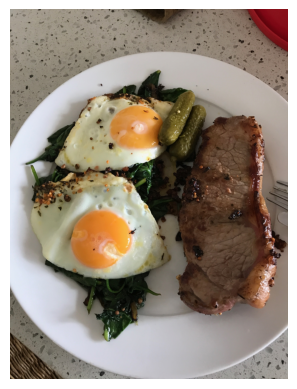

In [ ]:
## View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')

In [ ]:
steak.shape

(4032, 3024, 3)

**NOTE:** When you train a neural network and you want to make a prediction with it on your own custom data, it is important that your custom data(or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
## create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape = 224):
  '''
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, color_channels)
  '''
  ## reading the image
  img = tf.io.read_file(filename)
  ## decode the read file into a tensor
  img = tf.image.decode_image(img)
  ## resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  ## rescaling the image (between 0 and 1)
  img = img/255.

  return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 195ms/step


array([[0.777374]], dtype=float32)

Outputs a prediction probability

In [ ]:
## we can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  '''
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  '''
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediciton
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis('off')

1/1 [==============================] - 0s 19ms/step


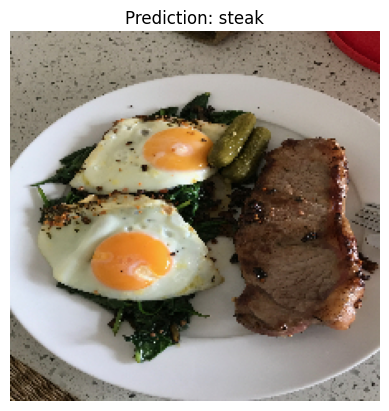

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg')

--2023-10-08 04:47:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2023-10-08 04:47:50 (32.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


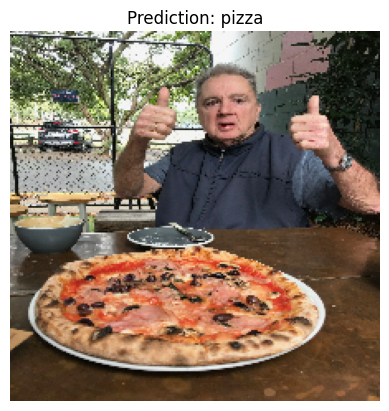

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# Multi-class Image Classification (10 classes)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

--2023-10-08 04:47:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.207, 142.250.98.207, 142.250.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  9.79MB/s    in 6.2s    

2023-10-08 04:47:57 (79.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

## Walkthrough 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 10 directori

In [ ]:
## Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
## Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['497639.jpg']
Image Shape: (512, 512, 3)


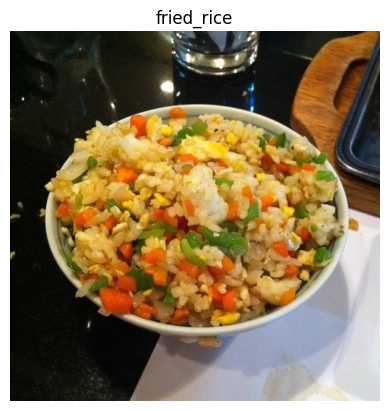

In [ ]:
## Visualize !!!
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

## Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             class_mode = 'categorical',
                                             batch_size = 32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (Start with a baseline)

In [ ]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape = (224, 224, 3)),
    tf.keras.layers.Activation(activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3),
    tf.keras.layers.Activation(activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3),
    tf.keras.layers.Activation(activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3),
    tf.keras.layers.Activation(activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])


## Compiling
model_8.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## Fitting the model
history_8 = model_8.fit(train_data,
                        epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 31s 122ms/step - loss: 2.0801 - accuracy: 0.2437 - val_loss: 1.9018 - val_accuracy: 0.3312
Epoch 2/10
235/235 [==============================] - 27s 116ms/step - loss: 1.8048 - accuracy: 0.3867 - val_loss: 1.8274 - val_accuracy: 0.3788
Epoch 3/10
235/235 [==============================] - 32s 138ms/step - loss: 1.4954 - accuracy: 0.5027 - val_loss: 1.8477 - val_accuracy: 0.3680
Epoch 4/10
235/235 [==============================] - 27s 117ms/step - loss: 0.9280 - accuracy: 0.6953 - val_loss: 2.2946 - val_accuracy: 0.3292
Epoch 5/10
235/235 [==============================] - 32s 138ms/step - loss: 0.3786 - accuracy: 0.8867 - val_loss: 3.0874 - val_accuracy: 0.3076
Epoch 6/10
235/235 [==============================] - 27s 114ms/step - loss: 0.1098 - accuracy: 0.9720 - val_loss: 4.2796 - val_accuracy: 0.2912
Epoch 7/10
235/235 [==============================] - 32s 136ms/step - loss: 0.0395 - accuracy: 0.9917 - val_loss: 4.8550 - val_ac

### 5. Evaluate the model

In [ ]:
## Evaluating on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 5.7660 - accuracy: 0.2808


[5.765974998474121, 0.2808000147342682]

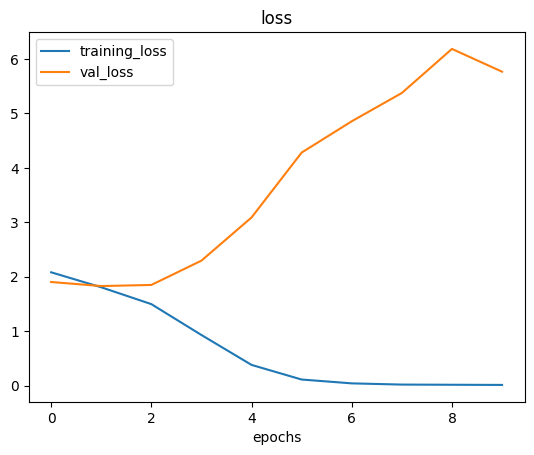

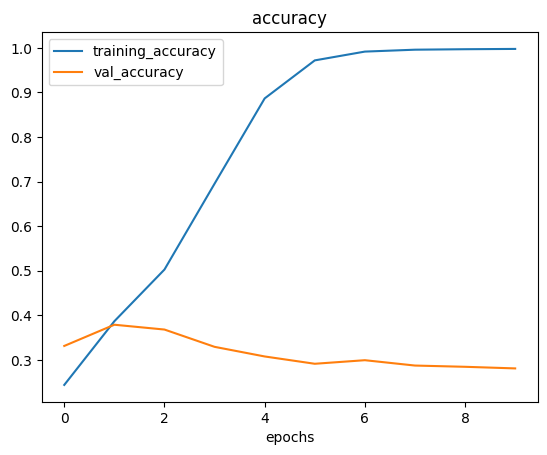

In [ ]:
## Check out the models loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well ... it seems our model is **overfitting** the training set quite badly ... in other words, it's getting great results on the training data but fails to generalize well on the unseen data and performs poorly on the test dataset

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)


Due to its performance on the training data, its clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, lets try and fix overfitting by ...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns ...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicate of a model, one way to simplify a model is to: reduce no. of layers or reduce no. of hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on oyour own dataset

In [ ]:
# Simplifying the model
## lets try to remove 2 Convolutional layers
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                      

In [ ]:
## Fitting model_9 with 2x Conv layers removed

model_9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape = (224, 224, 3)),
    tf.keras.layers.Activation(activation = 'relu'),

    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3),
    tf.keras.layers.Activation(activation = 'relu'),

    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])


## Compiling
model_9.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## Fitting the model
history_9 = model_9.fit(train_data,
                        epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 38s 152ms/step - loss: 0.0414 - accuracy: 0.9885 - val_loss: 6.0094 - val_accuracy: 0.2692
Epoch 2/10
235/235 [==============================] - 35s 150ms/step - loss: 0.0424 - accuracy: 0.9853 - val_loss: 6.6925 - val_accuracy: 0.2844
Epoch 3/10
235/235 [==============================] - 28s 118ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 6.5827 - val_accuracy: 0.2556
Epoch 4/10
235/235 [==============================] - 28s 120ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 7.0930 - val_accuracy: 0.2836
Epoch 5/10
235/235 [==============================] - 45s 192ms/step - loss: 0.0303 - accuracy: 0.9895 - val_loss: 6.8077 - val_accuracy: 0.2748
Epoch 6/10
235/235 [==============================] - 32s 136ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 7.4445 - val_accuracy: 0.2672
Epoch 7/10
235/235 [==============================] - 33s 139ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 7.4396 - val_ac

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_4 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 activation_5 (Activation)   (None, 109, 109, 10)      0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                

In [ ]:
## Check out the loss curves of model_9
plot_loss_curves(history_9)

### Next we try to reduce overfitting with data augmentation

Lets try and improve our models results by using augmented training data ...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
## Create an augmneted data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   class_mode = 'categorical',
                                                                   batch_size = 32)


Found 7500 images belonging to 10 classes.


In [ ]:
## Lets create another model but this time we'll fit it on the augmented

model_10 = tf.keras.models.clone_model(model_8)

# Compiling the cloned model (using the same setup as previous models)
model_10.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 522ms/step - loss: 2.1918 - accuracy: 0.1884 - val_loss: 2.0753 - val_accuracy: 0.2464
Epoch 2/5
235/235 [==============================] - 114s 485ms/step - loss: 2.0709 - accuracy: 0.2596 - val_loss: 1.9613 - val_accuracy: 0.3080
Epoch 3/5
235/235 [==============================] - 118s 504ms/step - loss: 2.0153 - accuracy: 0.2943 - val_loss: 1.9129 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 142s 605ms/step - loss: 1.9659 - accuracy: 0.3177 - val_loss: 1.7942 - val_accuracy: 0.3832
Epoch 5/5
235/235 [==============================] - 109s 466ms/step - loss: 1.9361 - accuracy: 0.3259 - val_loss: 1.7687 - val_accuracy: 0.3912


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 6s 79ms/step - loss: 7.4107 - accuracy: 0.2448


[7.410709381103516, 0.24480000138282776]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 1.7687 - accuracy: 0.3912


[1.7686675786972046, 0.3912000060081482]

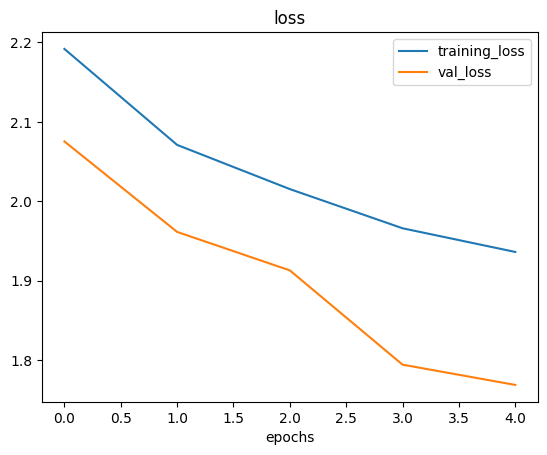

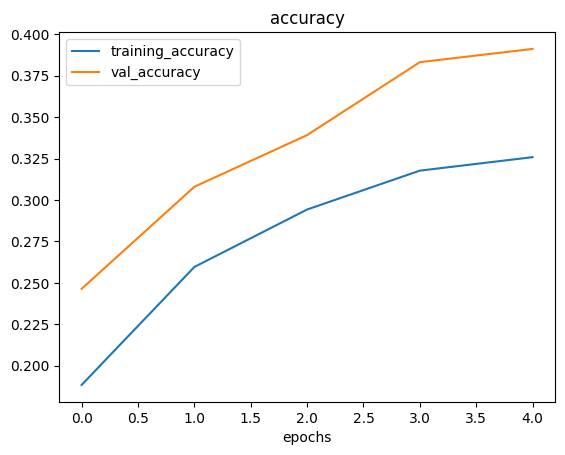

In [ ]:
## Check out the loss curves
plot_loss_curves(history_10)

### 7. Repeat until satisfied

We could keep going here ...  continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our models architectures (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our `ImageDataGenerator` instance)
- training for longer (e.g. increase number of epochs)
- try **transfer learning**

### Making a prediction with our trained model

Lets use our trained model to make some predictions on our own custom images!

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
## Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-10-08 06:12:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.09s   

2023-10-08 06:12:59 (31.7 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-10-08 06:12:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
## Reconfig pred_and_plot function

def pred_and_plot(model, filename, class_names = class_names):
  '''
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  '''
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediciton
  pred = model.predict(tf.expand_dims(img, axis = 0))

  print(len(pred[0]))
  print(tf.argmax(pred))

  ## Add in logic for multiclass and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # get the predicted class
    pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis('off')

1/1 [==============================] - 0s 18ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


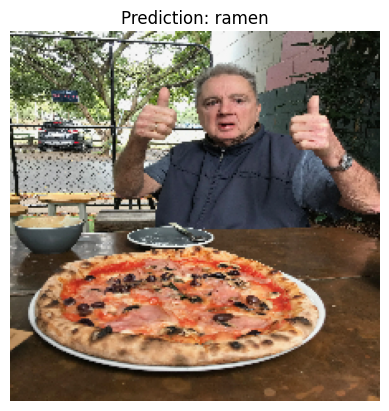

In [ ]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = '03-pizza-dad.jpeg',
              class_names = class_names)

1/1 [==============================] - 0s 21ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


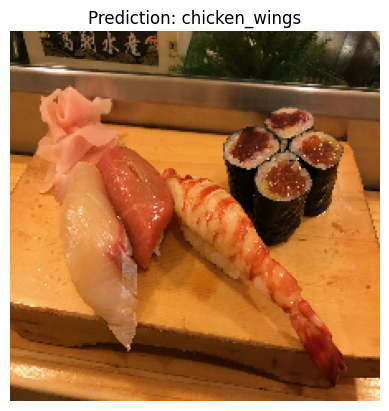

In [ ]:
pred_and_plot(model = model_10,
              filename = '03-sushi.jpeg',
              class_names = class_names)

1/1 [==============================] - 0s 18ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


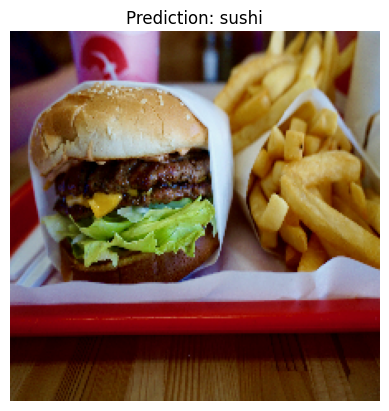

In [ ]:
pred_and_plot(model = model_10,
              filename = '03-hamburger.jpeg',
              class_names = class_names)

 Looks like our model didn't perform very well on our custom images but this is because it only achieved less accuracy.

### Saving and Loading our model

In [ ]:
## Save the model
model_10.save('Saved_trained_model_10')

In [ ]:
## Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("Saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 1.7687 - accuracy: 0.3912


[1.768667221069336, 0.3912000060081482]

In [ ]:
##Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 9s 116ms/step - loss: 1.7687 - accuracy: 0.3912


[1.768667221069336, 0.3912000060081482]